# Image Classification
## Switch vs. Access Point

In [69]:
from IPython.display import display as print
from IPython.display import Image, display, Markdown

import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

### Uncomment the following if running your own server that has a GPU.
### The following will prevent tensorflow use ALL of your GPU
### or you'll get out of memory errors with other applications
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

data = tf.keras.utils.image_dataset_from_directory(
    directory="../data"
    )


Found 297 files belonging to 2 classes.


### The following will generate an error. The error can be ignored.

The following will load the dataset into numpy and cycle through the shapes using the Python generator, next().


In [70]:
data_iterator = data.as_numpy_iterator()  # type: ignore
batch = data_iterator.next()


2023-07-26 13:52:43.400743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [297]
	 [[{{node Placeholder/_4}}]]
2023-07-26 13:52:43.401931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [297]
	 [[{{node Placeholder/_4}}]]


### Print the batch

In [71]:
# Print the batch 
# 0 is access points
# 1 is switches

print(batch[0].shape)
print(batch[1])

(32, 256, 256, 3)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

## Show images from batch

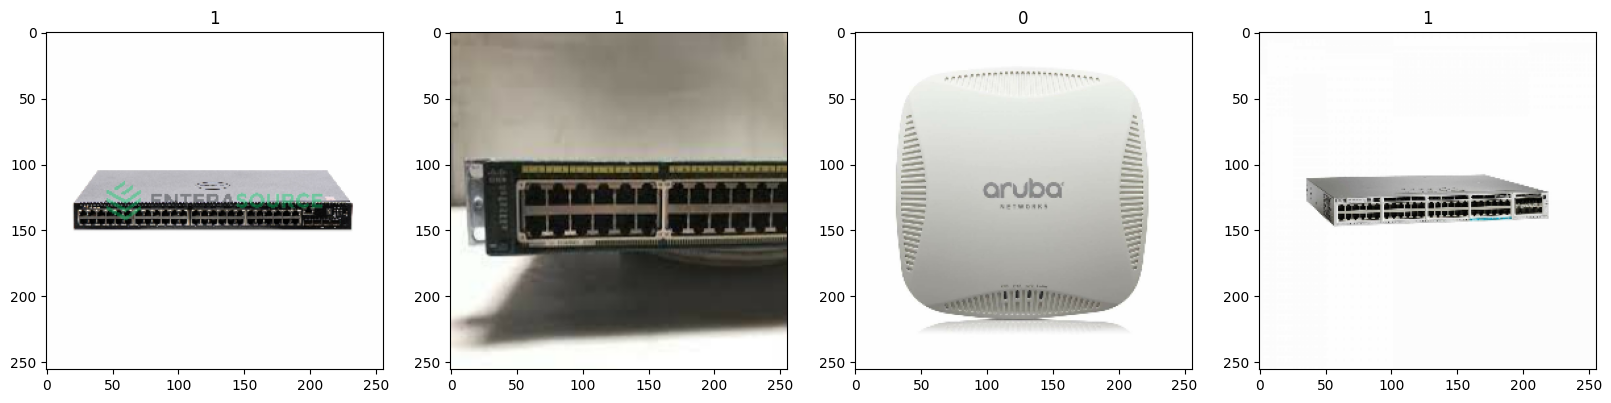

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(np.uint8))
    ax[idx].title.set_text(batch[1][idx])

plt.show()

## SCALE DATA

In [56]:
data = data.map(lambda x, y: (x/255, y))  # type: ignore
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

2023-07-26 12:38:37.191801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [297]
	 [[{{node Placeholder/_4}}]]
2023-07-26 12:38:37.192286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [297]
	 [[{{node Placeholder/_4}}]]


## Display Scaled Data

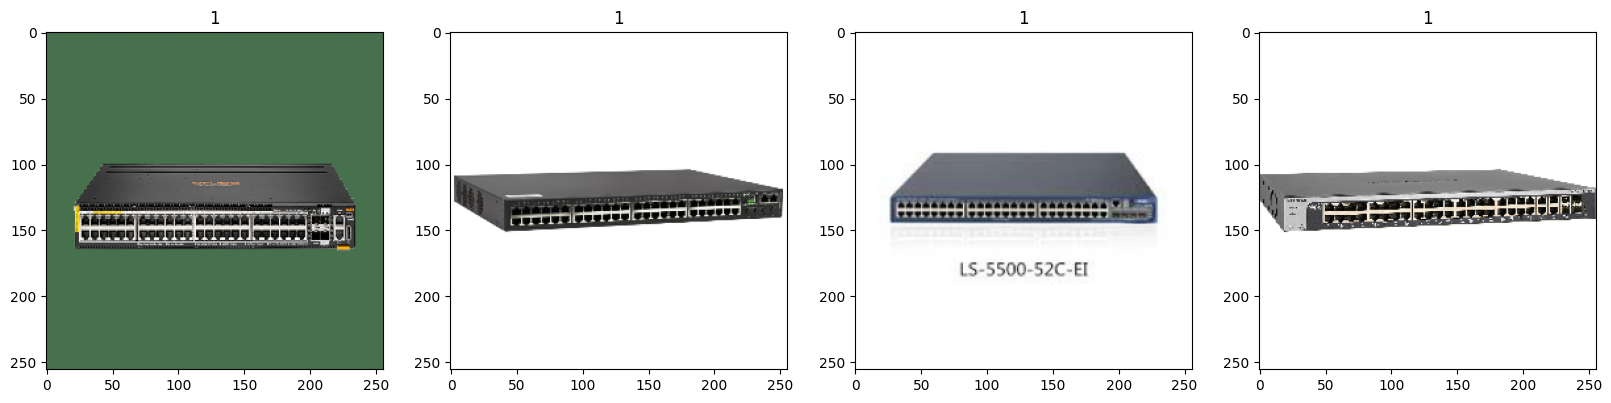

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

plt.show()

## SPLIT DATA

In [72]:
# print(len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

# print(train_size+val_size+test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [73]:

from tensorflow.keras.layers import (Conv2D, Dense, Flatten, MaxPooling2D)
from tensorflow.keras.models import Sequential  # type: ignore

model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
# Print the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

None

## Train Model

The training process can take a significant amount of time. On my personal machine, this took roughly 5 seconds. 
On shared hosting and training environments, this can take 2 or more minutes.

In [61]:

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-26 12:39:15.359530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [297]
	 [[{{node Placeholder/_4}}]]
2023-07-26 12:39:15.360315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [297]
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - ETA: 0s - loss: 1.4140 - accuracy: 0.5893

2023-07-26 12:39:20.988422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [297]
	 [[{{node Placeholder/_4}}]]
2023-07-26 12:39:20.988994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [297]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - 7s 739ms/step - loss: 1.4140 - accuracy: 0.5893 - val_loss: 0.6933 - val_accuracy: 0.4795
Epoch 2/20
7/7 [==============================] - 6s 734ms/step - loss: 0.6545 - accuracy: 0.6786 - val_loss: 0.6408 - val_accuracy: 0.6575
Epoch 3/20
7/7 [==============================] - 6s 715ms/step - loss: 0.6044 - accuracy: 0.7098 - val_loss: 0.5371 - val_accuracy: 0.7123
Epoch 4/20
7/7 [==============================] - 6s 728ms/step - loss: 0.5094 - accuracy: 0.7098 - val_loss: 0.4578 - val_accuracy: 0.7534
Epoch 5/20
7/7 [==============================] - 6s 788ms/step - loss: 0.4110 - accuracy: 0.7366 - val_loss: 0.4121 - val_accuracy: 0.7671
Epoch 6/20
7/7 [==============================] - 6s 749ms/step - loss: 0.3377 - accuracy: 0.7946 - val_loss: 0.2535 - val_accuracy: 0.9315
Epoch 7/20
7/7 [==============================] - 6s 784ms/step - loss: 0.2842 - accuracy: 0.8705 - val_loss: 0.1638 - val_accuracy: 0.9452
Epoch 8/20
7/7 [===============

## Plot Performance

### Loss

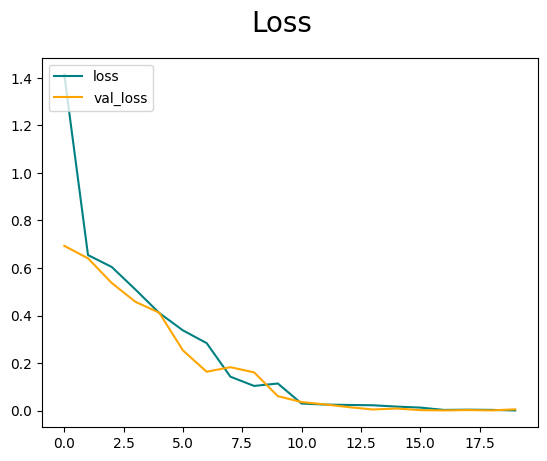

In [74]:

##
# Loss
#
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Accuracy

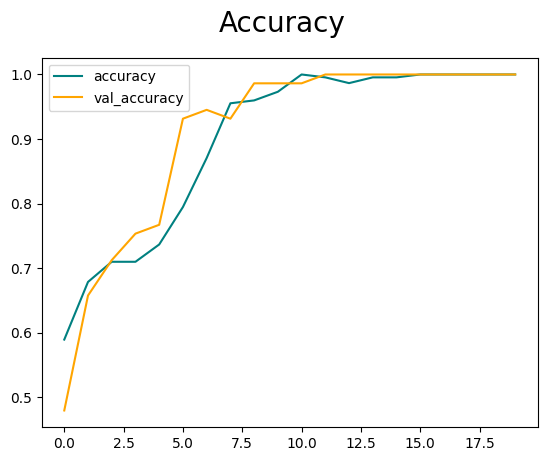

In [64]:
##
# Accuracy
#
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate Model

In [ ]:
####
# Evaluate Model
#
# from tensorflow.keras.metrics import BinaryAccuracy  # type: ignore
# from tensorflow.keras.metrics import Precision, Recall

# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

# for batch in test.as_numpy_iterator():
#     X, y = batch
#     yhat = model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

# print(pre.result(), re.result(), acc.result())

## Test Model

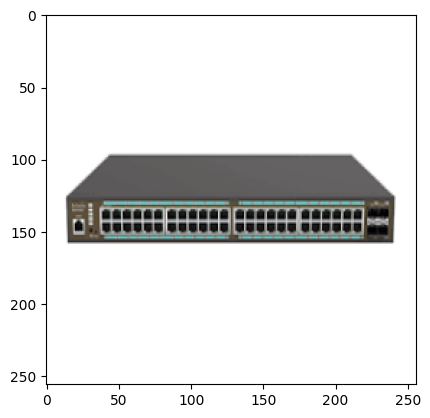

1/1 [==============================] - 0s 162ms/step


'Predicted class of image is a Switch'

In [66]:
####
# Test Model
#
import cv2

img = cv2.imread('test_images/test_switch-1.png')
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))  # type: ignore
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))  # type: ignore

if yhat > 0.5:
    print('Predicted class of image is a Switch')
else:
    print('Predicted class of image is an Access Point')

## Save Model

In [68]:
####
# Save Model
#
import os
model.save(os.path.join('models', 'imageclassifier.h5'))